In [1]:
import math

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils import data
from torch import optim, autograd
from tqdm import tqdm

from vae import SimpleDecoder, SimpleDeterministicEncoder
from distribution_dists import rbf_kernel_dist
from data import CircleData

In [2]:
n_circle_samples = 1e5
circle_data = CircleData(int(n_circle_samples), sigma=0.1)

In [3]:
simple_encoder = SimpleDeterministicEncoder(2, 1)
simple_decoder = SimpleDecoder(1, 2)

# Train the Decoder and Encoder
optimizer_simple_encoder = optim.SGD(simple_encoder.parameters(), lr=0.1)
optimizer_simple_decoder = optim.SGD(simple_decoder.parameters(), lr=0.1)

In [4]:
circle_data_data_loader = data.DataLoader(circle_data, batch_size=100, shuffle=True)

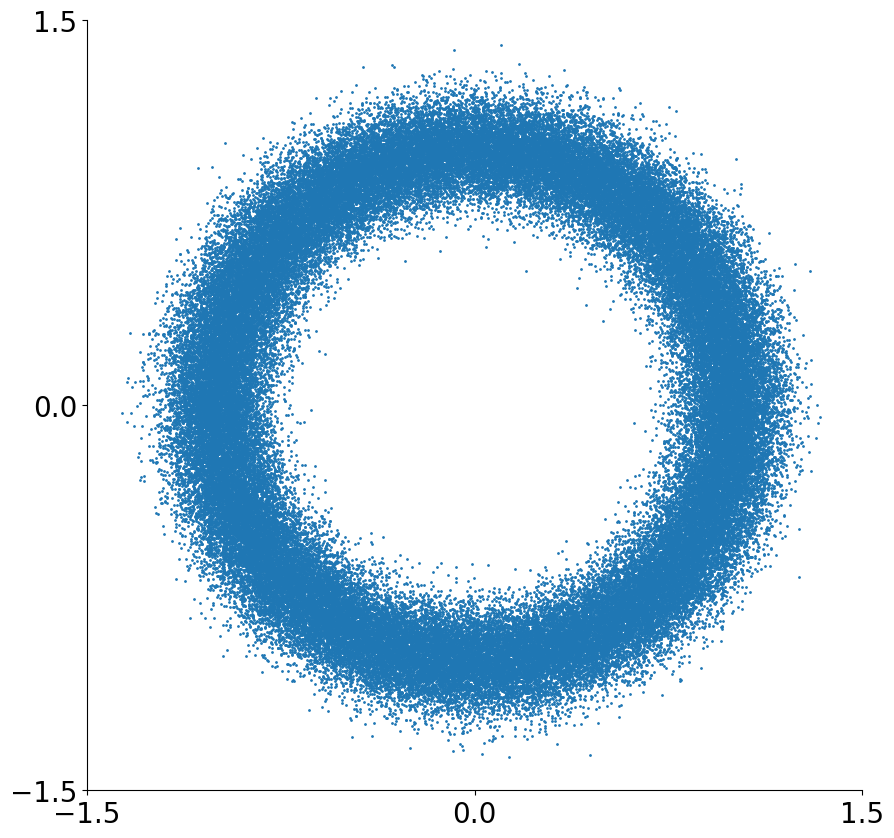

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(circle_data.data[0, :], circle_data.data[1, :], s=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks([-1.5, 0, 1.5], fontsize=20)
plt.yticks([-1.5, 0, 1.5], fontsize=20)
plt.savefig("./images/circle_data.png")

In [6]:
n_epochs = 20

simple_encoder.train()
simple_decoder.train()
reconstruction_loss = nn.MSELoss()
for epoch in range(n_epochs):
    step = 0
    for batch in tqdm(circle_data_data_loader):
        optimizer_simple_encoder.zero_grad()
        optimizer_simple_decoder.zero_grad()

        # ======== Train Generator ======== #

        batch_size = batch.size()[0]
 
        z = simple_encoder(batch)
        x_recon = simple_decoder(z)


        # ======== MMD Kernel Loss ======== #
        z_fake = autograd.Variable(2* math.pi * torch.rand((batch_size, simple_encoder.dim_latent)))
        distributional_loss = rbf_kernel_dist(z, z_fake)
        recon_loss = reconstruction_loss(x_recon, batch)
        total_loss = distributional_loss +  recon_loss
        total_loss.backward()
        optimizer_simple_encoder.step()
        optimizer_simple_decoder.step()
        #print(distributional_loss.item())
        # print(recon_loss.item())
    print(f"Epoch {epoch} : {total_loss.item()}")
    print(f"Reconstruction Loss : {recon_loss.item()}")
    print(f"Distributional Loss : {distributional_loss.item()}")

100%|██████████| 1000/1000 [00:11<00:00, 90.32it/s]


Epoch 0 : 0.4664228558540344
Reconstruction Loss : 0.18473221361637115
Distributional Loss : 0.28169065713882446


100%|██████████| 1000/1000 [00:11<00:00, 85.03it/s]


Epoch 1 : 0.22481389343738556
Reconstruction Loss : 0.10345521569252014
Distributional Loss : 0.12135867774486542


100%|██████████| 1000/1000 [00:10<00:00, 97.05it/s]


Epoch 2 : 0.23433643579483032
Reconstruction Loss : 0.0492219403386116
Distributional Loss : 0.18511450290679932


100%|██████████| 1000/1000 [00:10<00:00, 98.99it/s]


Epoch 3 : 0.1387857049703598
Reconstruction Loss : 0.011609137058258057
Distributional Loss : 0.12717656791210175


100%|██████████| 1000/1000 [00:09<00:00, 106.82it/s]


Epoch 4 : 0.12448546290397644
Reconstruction Loss : 0.05825548246502876
Distributional Loss : 0.06622998416423798


100%|██████████| 1000/1000 [00:08<00:00, 119.93it/s]


Epoch 5 : 0.21812589466571808
Reconstruction Loss : 0.047961726784706116
Distributional Loss : 0.17016416788101196


100%|██████████| 1000/1000 [00:10<00:00, 91.29it/s]


Epoch 6 : 0.052204735577106476
Reconstruction Loss : 0.0281650610268116
Distributional Loss : 0.024039672687649727


100%|██████████| 1000/1000 [00:10<00:00, 96.01it/s]


Epoch 7 : 0.07874981313943863
Reconstruction Loss : 0.01768973283469677
Distributional Loss : 0.06106007844209671


100%|██████████| 1000/1000 [00:13<00:00, 71.74it/s]


Epoch 8 : 0.13734090328216553
Reconstruction Loss : 0.039404015988111496
Distributional Loss : 0.09793688356876373


100%|██████████| 1000/1000 [00:09<00:00, 102.75it/s]


Epoch 9 : 0.11448321491479874
Reconstruction Loss : 0.021187832579016685
Distributional Loss : 0.0932953804731369


100%|██████████| 1000/1000 [00:09<00:00, 104.49it/s]


Epoch 10 : 0.059589602053165436
Reconstruction Loss : 0.016224047169089317
Distributional Loss : 0.04336555302143097


100%|██████████| 1000/1000 [00:10<00:00, 91.48it/s]


Epoch 11 : 0.08082132041454315
Reconstruction Loss : 0.011303058825433254
Distributional Loss : 0.06951826065778732


100%|██████████| 1000/1000 [00:09<00:00, 101.44it/s]


Epoch 12 : 0.07397672533988953
Reconstruction Loss : 0.029187729582190514
Distributional Loss : 0.044788993895053864


100%|██████████| 1000/1000 [00:12<00:00, 77.97it/s]


Epoch 13 : 0.13989907503128052
Reconstruction Loss : 0.03515862300992012
Distributional Loss : 0.1047404557466507


100%|██████████| 1000/1000 [00:14<00:00, 71.33it/s]


Epoch 14 : 0.06102076172828674
Reconstruction Loss : 0.03242572024464607
Distributional Loss : 0.02859504148364067


100%|██████████| 1000/1000 [00:12<00:00, 81.44it/s]


Epoch 15 : 0.058817289769649506
Reconstruction Loss : 0.018628058955073357
Distributional Loss : 0.040189228951931


100%|██████████| 1000/1000 [00:14<00:00, 69.17it/s]


Epoch 16 : 0.07193242013454437
Reconstruction Loss : 0.009182496927678585
Distributional Loss : 0.06274992227554321


100%|██████████| 1000/1000 [00:15<00:00, 64.59it/s]


Epoch 17 : 0.1080193743109703
Reconstruction Loss : 0.01070244051516056
Distributional Loss : 0.0973169356584549


100%|██████████| 1000/1000 [00:13<00:00, 74.42it/s]


Epoch 18 : 0.06294053047895432
Reconstruction Loss : 0.007390160579234362
Distributional Loss : 0.05555037036538124


100%|██████████| 1000/1000 [00:13<00:00, 75.89it/s]


Epoch 19 : 0.07144337147474289
Reconstruction Loss : 0.013579118065536022
Distributional Loss : 0.05786425620317459


(array([ 121.,  394.,  838., 1255., 1295., 1029.,  883., 1126., 1291.,
        1384., 1350., 1366., 1316., 1218., 1315., 1201., 1215., 1202.,
        1161., 1126., 1047., 1097., 1040., 1053., 1049., 1089., 1063.,
        1136., 1009.,  895.,  906.,  876.,  997., 1027.,  968., 1050.,
         993., 1128., 1140., 1054.,  770.,  740.,  948., 1224., 1045.,
        1516., 1125.,  677.,  719.,  837.,  973., 1101., 1093., 1118.,
        1172., 1269.,  929.,  927.,  890.,  785.,  805.,  941., 1035.,
         927., 1042., 1075., 1141., 1072., 1022., 1028.,  978.,  906.,
         963., 1057., 1069., 1042., 1114., 1153., 1116., 1276., 1302.,
        1203., 1134., 1024.,  877.,  824.,  833.,  989., 1006., 1084.,
        1029.,  739.,  707.,  774.,  747.,  744.,  656.,  570.,  329.,
         106.]),
 array([-6.21795654e-03,  5.97319715e-02,  1.25681892e-01,  1.91631824e-01,
         2.57581741e-01,  3.23531687e-01,  3.89481604e-01,  4.55431521e-01,
         5.21381438e-01,  5.87331355e-01,  6.53281

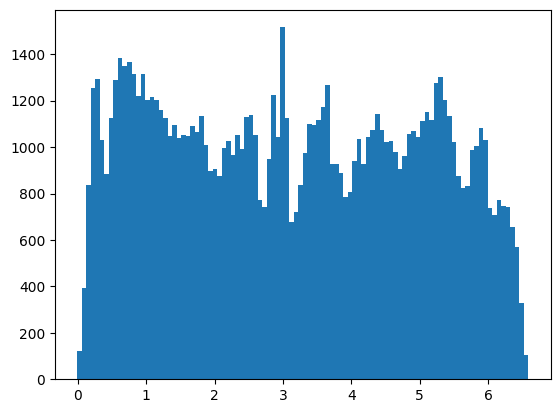

In [7]:
simple_encoder.train(False)
encoded_values = simple_encoder(circle_data.data.t())
plt.hist(encoded_values.detach().numpy(), bins=100)

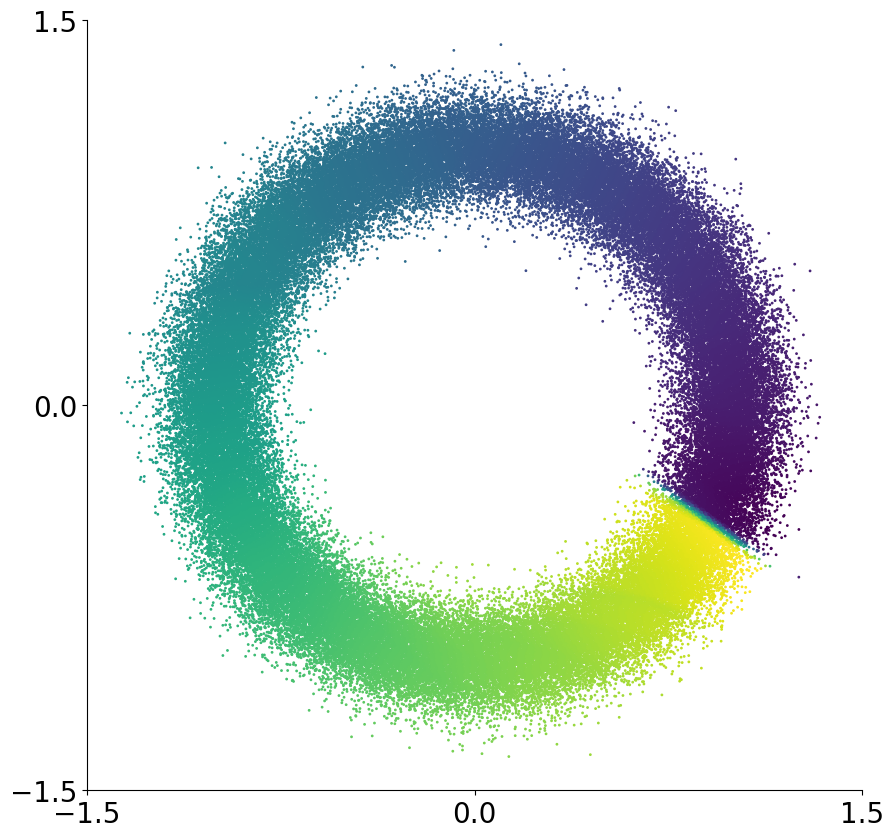

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(circle_data.data[0,:], 
            circle_data.data[1, :], 
            c=encoded_values.detach().numpy().flatten(), s=1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks([-1.5, 0, 1.5], fontsize=20)
plt.yticks([-1.5, 0, 1.5], fontsize=20)
plt.savefig("./images/circle_data_with_encoded_values.png")

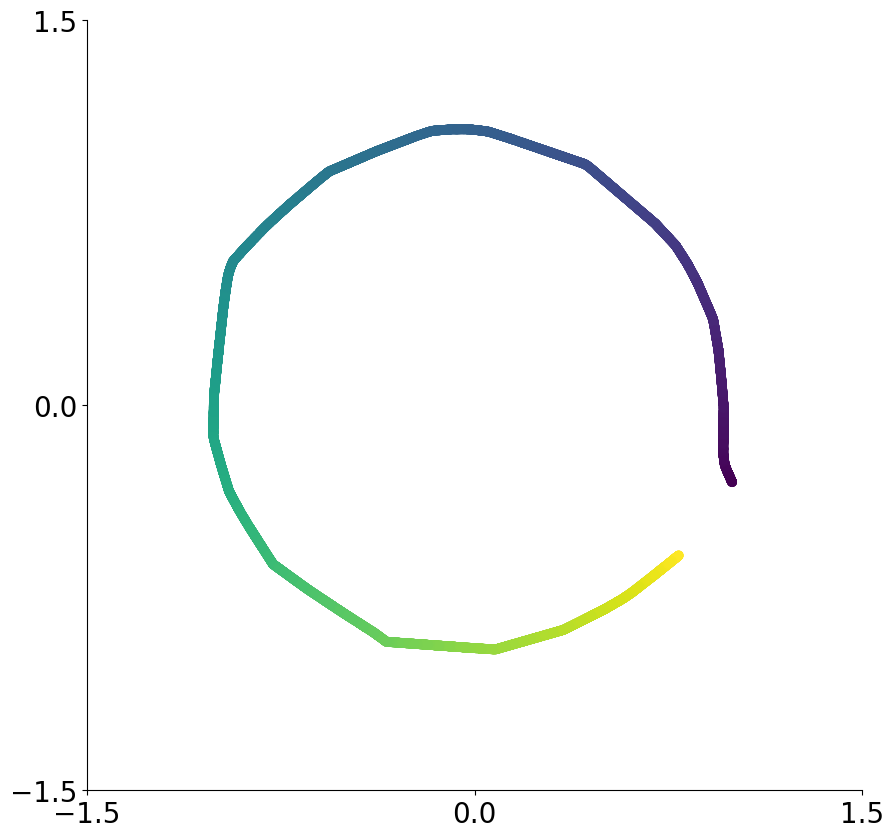

In [11]:
simple_decoder.train(False)

randomly_generated_values = 2 * math.pi * torch.rand((10000, 1))
reconstructed_data = simple_decoder(randomly_generated_values).detach().numpy()

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], c=randomly_generated_values.detach().numpy().flatten())
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks([-1.5, 0, 1.5], fontsize=20)
plt.yticks([-1.5, 0, 1.5], fontsize=20)
plt.savefig("./images/randomly_generated_values.png")